# Task Description

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Develop a machine learning model to detect fraudulent credit card transactions using anonymized transaction data.

# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'dataset\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

Dataset has 284807 records with 31 features:

'V1'...'V28' are numerically encoded features containing important personal information. So we cannot interpret their values anyhow.

'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

'Amount' is the transaction amount.

'Class' is the target variable. 

In [6]:
# Renaming the 'Class' feature for conveniece.
df.rename(columns={'Class': 'Target'}, inplace=True)
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Target'],
      dtype='object')

In [7]:
df.info()
# NaN values are absent, all parameters are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Finding and dropping duplicates
print(f'Number of duplicates: {len(df[df.duplicated()])}')
df.drop_duplicates(keep='first', inplace=True)
print(f'Shape after duplicates dropping: {df.shape}')

Number of duplicates: 1081
Shape after duplicates dropping: (283726, 31)


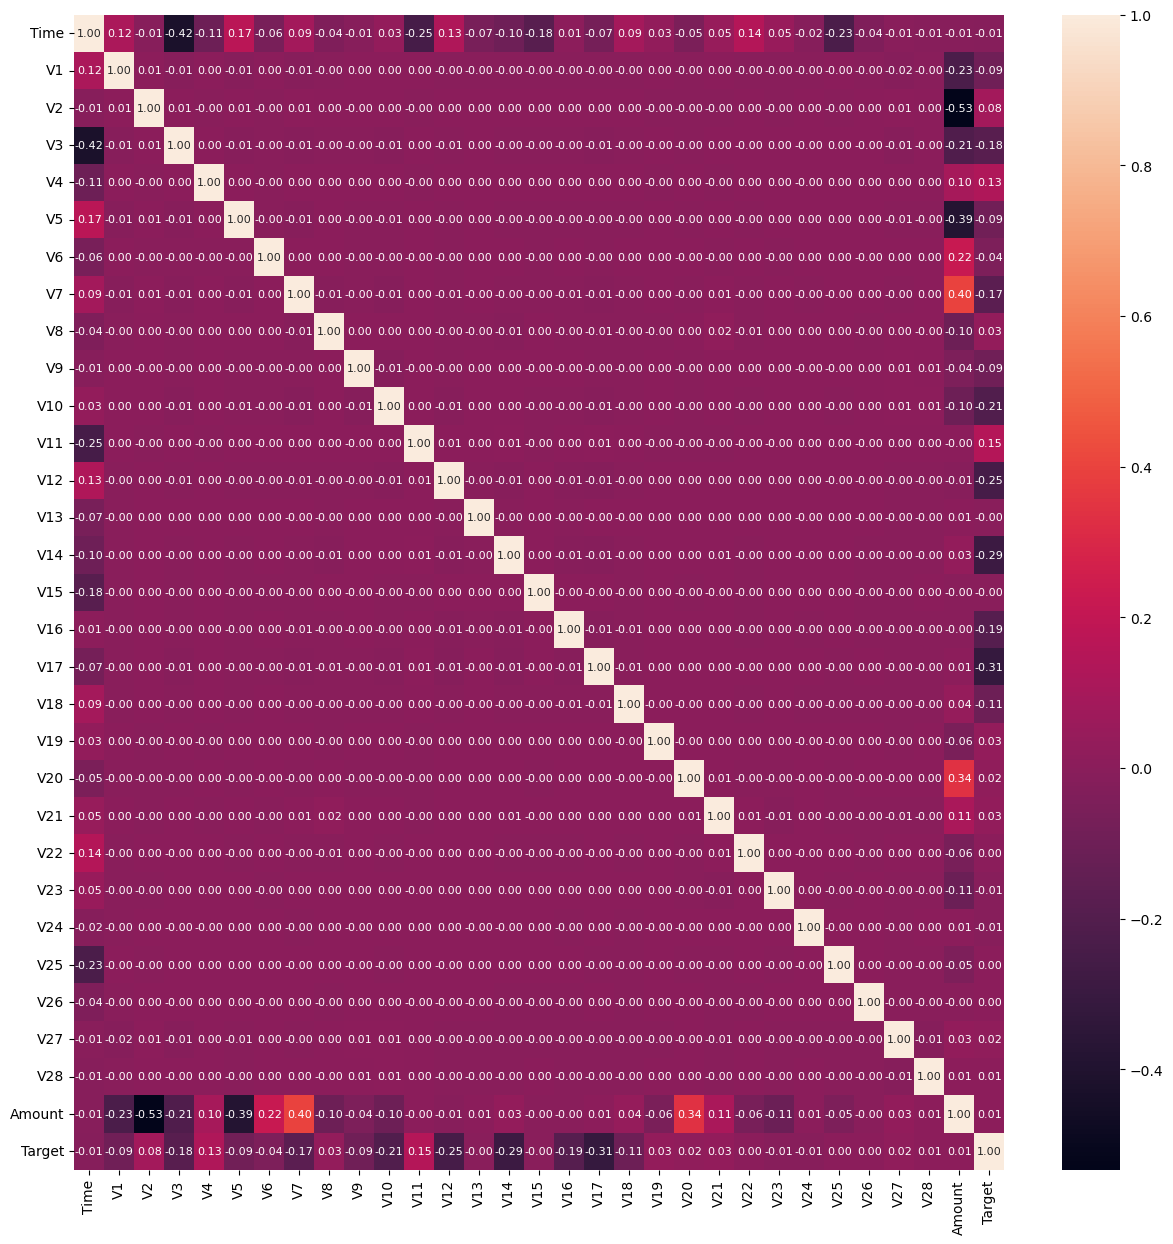

In [9]:
# Building a correlation matrix
from matplotlib.pyplot import figure
figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 8}, fmt='.2f');

Most features are not correlated. 

Nevertheless, several features have weak correlation:
1. 'Amount' - 'V5',
2. 'Amount' - 'V7',
3. 'Amount' - 'V20',
4. etc.

A few features have moderate correlation:
1. 'Amount' - 'V2',
2. 'Time' - 'V3'.

At least our dataframe has no strong correlations, which means the matrix won't be degenerated.

In [11]:
# Let us take a look at the descriptive statistics
pd.set_option('display.max_columns', None)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Target
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


As most of the features have no meaning for us, not much can be said about the statistics.

The most important fact for us is that some features have very large or very small values that we will need to normalise.

In [13]:
print(df['Target'].describe())
print('-'*20)
print(df['Target'].value_counts())
print('-'*20)
print(f'Value 1 makes only {df['Target'].value_counts()[1]/len(df)*100:.2f}% of the total number of values.')

count    283726.000000
mean          0.001667
std           0.040796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64
--------------------
Target
0    283253
1       473
Name: count, dtype: int64
--------------------
Value 1 makes only 0.17% of the total number of values.


There is a significant imbalance in the values of the 'Target' variable. We will have to handle it further.

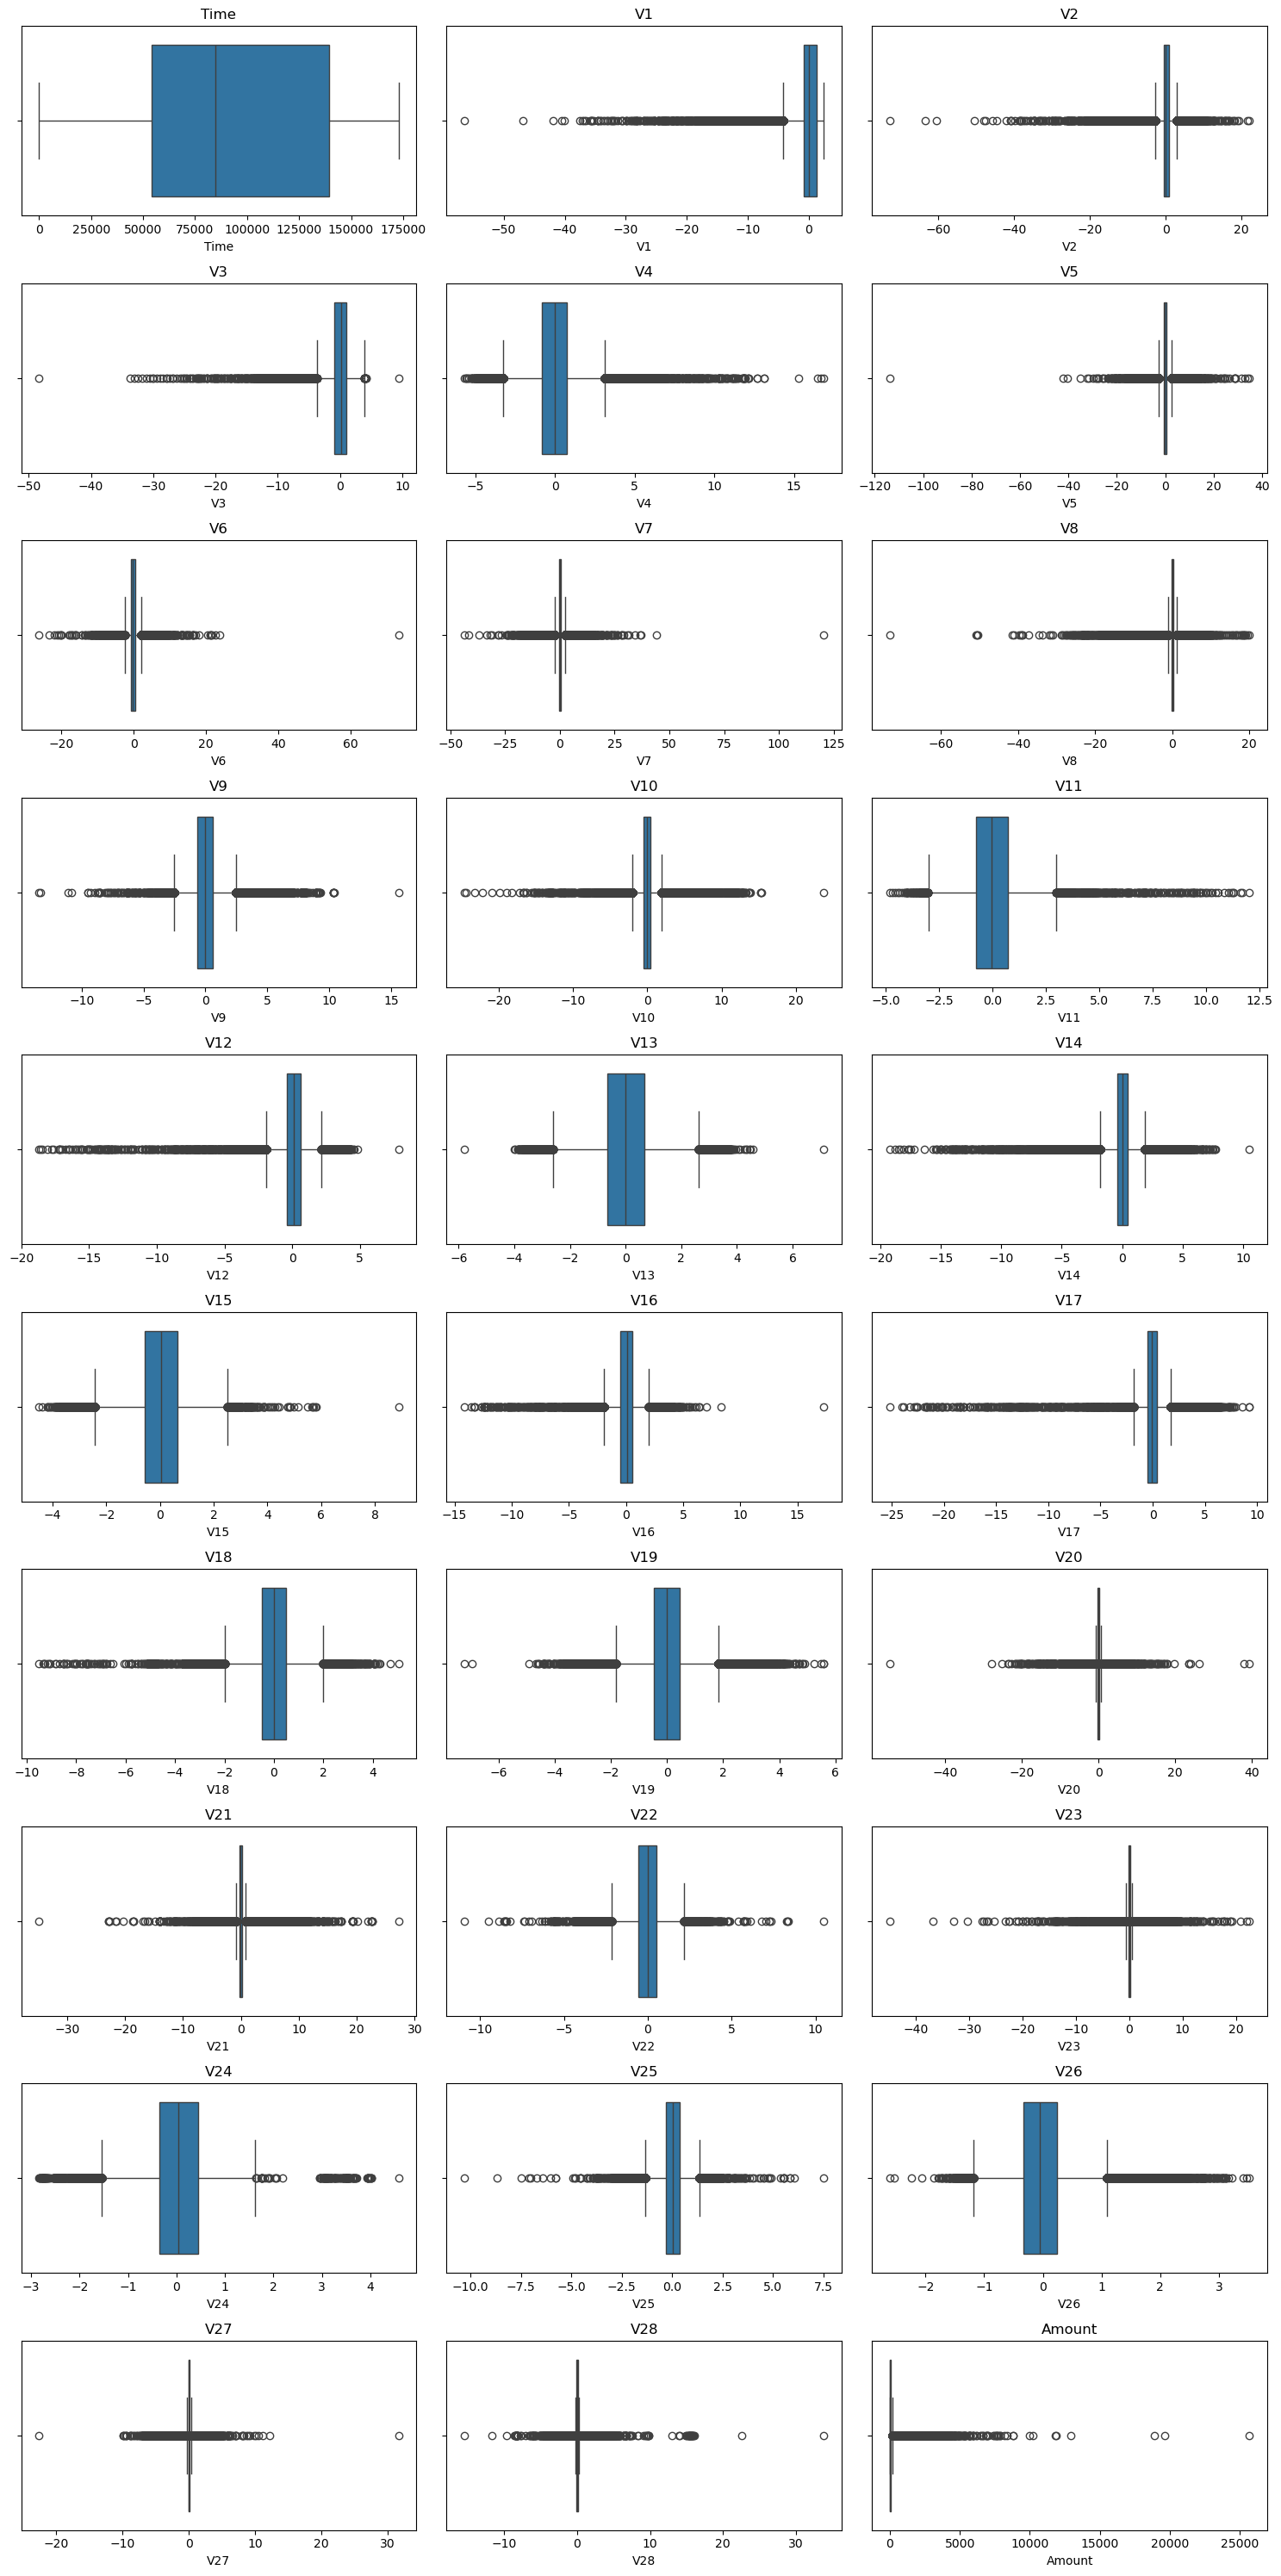

In [15]:
# Let us take a look at outliers
numerical_features = df.columns
numerical_features = numerical_features.drop('Target')

num_cols = 3
num_rows = (len(numerical_features) // num_cols) + int(len(numerical_features) % num_cols != 0)


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))
axes = axes.flatten()

for i, column in enumerate(numerical_features):

    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

As we can see, most features have quite a lot of outliers.

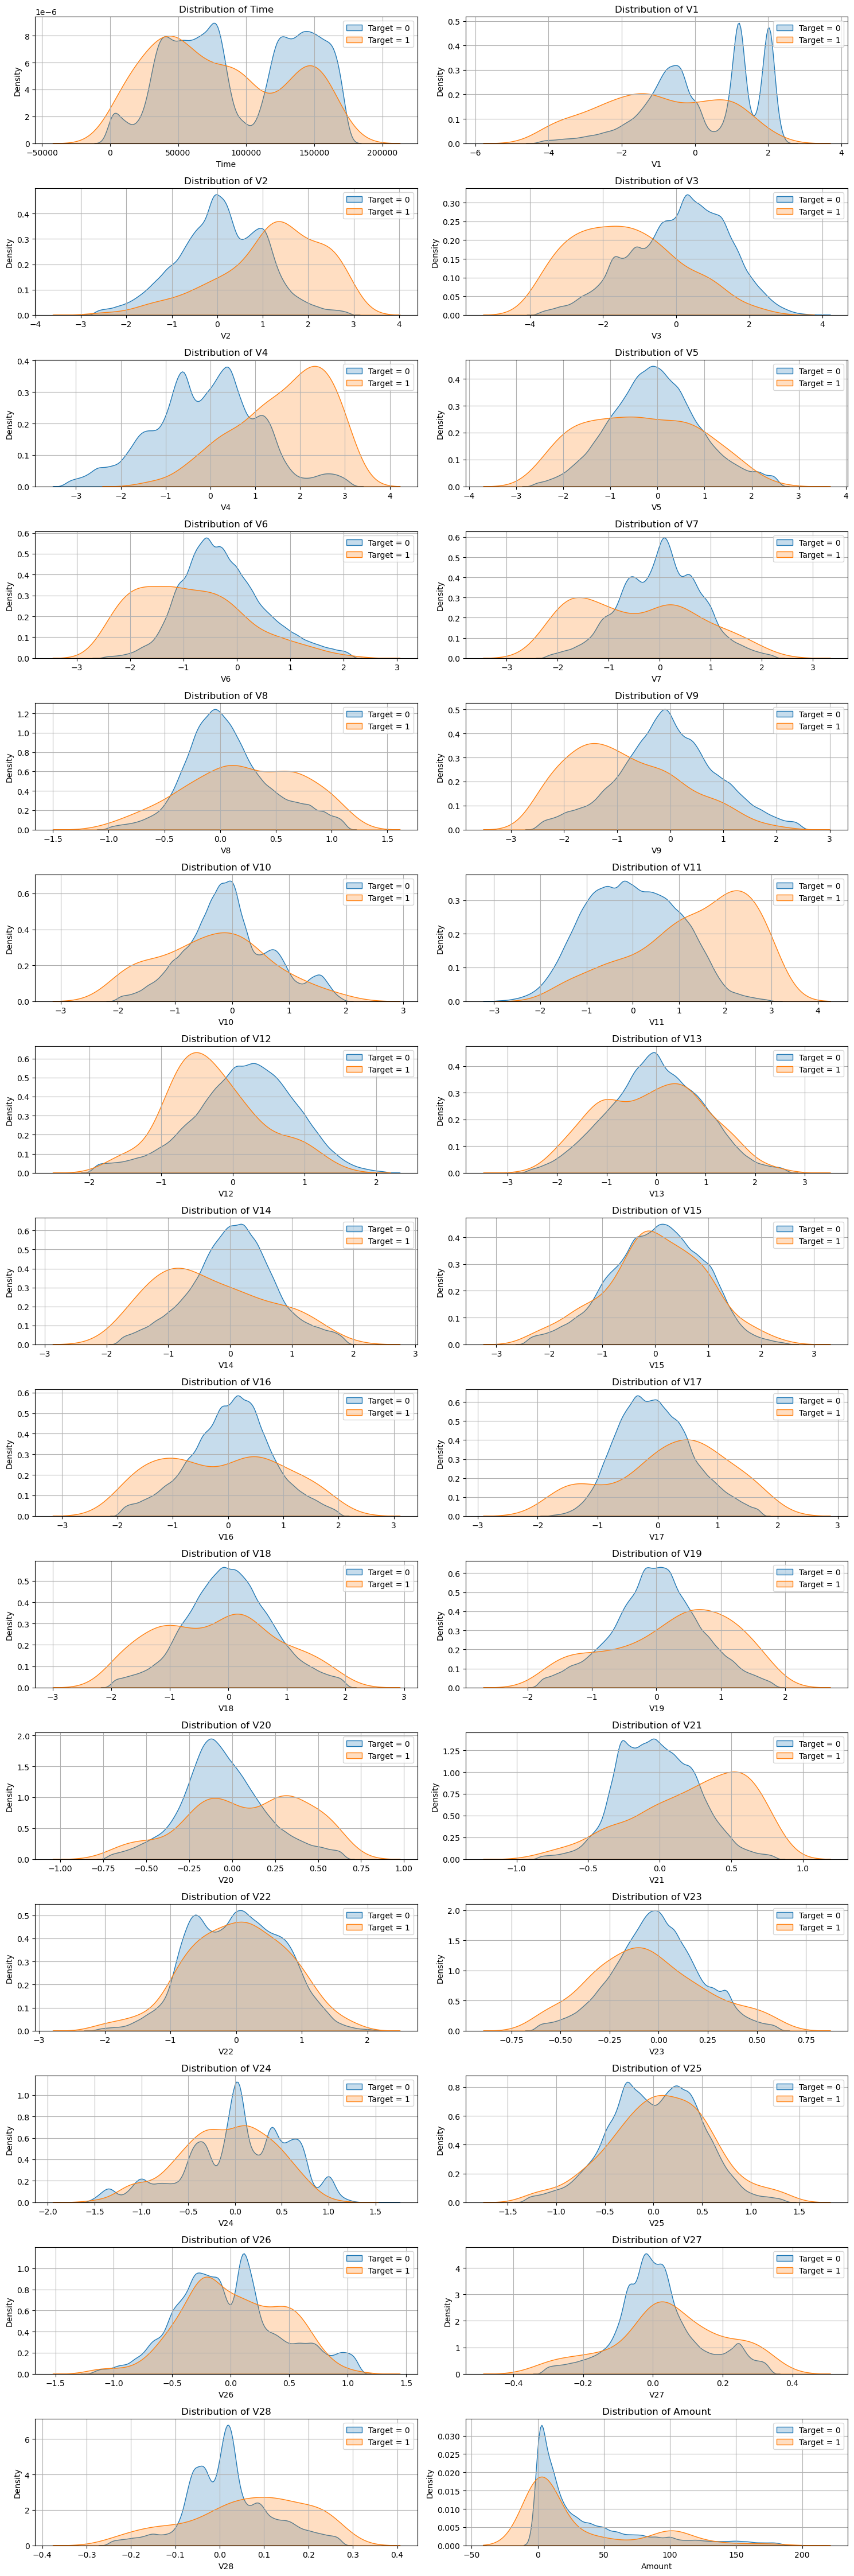

In [17]:
# Let us graphically display the distribution of the numerical features with regard to the 'Tagret' value
num_cols = 2
num_rows = (len(numerical_features) // num_cols) + int(len(numerical_features) % num_cols != 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 45)) 

for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i, num_cols)  

    # Removing outliers for clarity
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper = df[col].quantile(0.75) + 1.5 * iqr
    lower = df[col].quantile(0.25) - 1.5 * iqr
    data = df[(df[col] >= lower) & (df[col] <= upper)]
    
    sns.kdeplot(data=data[col][df['Target'] == 0], fill=True, ax=axes[row, col_idx], label='Target = 0')
    sns.kdeplot(data=data[col][df['Target'] == 1], fill=True, ax=axes[row, col_idx], label='Target = 1')
    
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Density')
    axes[row, col_idx].grid(True)
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

It is noteworthy that for features 'V13', 'V15', 'V22' and 'V25' graphs for both 'Target' values are almost identical.

Other graphs have noticeable differences and shifts in one or another direction. For example, the kde graph of 'V9' feature for 'Target' value = 1 is clearly skewed to the right, whereas for value = 0, its symmetrical.

Some variables have a bimodal distribution for 'Target' value = 0, and single-modal for value = 1, for instance, the 'Time' variable.

## Conclusion

Most features are either not correlated or have weak correlation ('Amount' - 'V5', 'Amount' - 'V7', 'Amount' - 'V20', etc.). A few features have moderate correlation ('Amount' - 'V2', 'Time' - 'V3').

Some features take very large or very small values that need to be normalised.

Except 'V13', 'V15', 'V22' and 'V25', there is noticeable difference in the features distribution depending on the target variable.

# Feature Normalisation

First of all, we need to scale our features. This will be a common step for all further developments, so it is placed in a separate chapter.

In [23]:
from sklearn.preprocessing import StandardScaler

# Instantiating the scaler
scaler = StandardScaler()

In [24]:
df_normalised = df.copy()
df_normalised[numerical_features] = scaler.fit_transform(df_normalised[numerical_features])
df_normalised.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Target
count,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,283726.000000
mean,1.218105e-16,-5.659779e-17,-2.404154e-18,-1.121939e-16,1.422458e-17,3.365816e-17,4.808308e-18,-1.883254e-17,-1.141973e-17,-3.190513e-17,9.215924e-18,2.724708e-17,-3.205539e-18,-1.552683e-17,1.202077e-17,1.362354e-17,-1.903289e-18,1.262181e-17,-1.522631e-17,1.254668e-17,-5.810039e-18,-9.215924e-18,1.923323e-17,2.604500e-18,1.412441e-17,4.006924e-17,-1.207086e-17,-5.860126e-18,-1.502596e-19,-5.409347e-17,0.001667
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.040796
min,-1.996823e+00,-2.895933e+01,-4.415594e+01,-3.203279e+01,-4.016602e+00,-8.260323e+01,-1.964022e+01,-3.548131e+01,-6.209721e+01,-1.226160e+01,-2.284160e+01,-4.709521e+00,-1.878306e+01,-5.819090e+00,-2.017886e+01,-4.918600e+00,-1.617386e+01,-2.986682e+01,-1.134527e+01,-8.868289e+00,-7.077808e+01,-4.811386e+01,-1.508956e+01,-7.184198e+01,-4.684150e+00,-1.975208e+01,-5.403358e+00,-5.702547e+01,-4.704087e+01,-3.533268e-01,0.000000
25%,-8.552128e-01,-4.732329e-01,-3.620488e-01,-5.907784e-01,-5.990519e-01,-5.022907e-01,-5.765260e-01,-4.515170e-01,-1.763908e-01,-5.866090e-01,-4.962232e-01,-7.478525e-01,-4.076546e-01,-6.514439e-01,-4.473627e-01,-6.366813e-01,-5.356809e-01,-5.745927e-01,-5.965414e-01,-5.606559e-01,-2.748846e-01,-3.148664e-01,-7.489963e-01,-2.595820e-01,-5.856219e-01,-6.086746e-01,-6.781691e-01,-1.829567e-01,-1.626863e-01,-3.309625e-01,0.000000
50%,-2.131081e-01,7.426456e-03,4.134568e-02,1.182157e-01,-1.363454e-02,-4.015609e-02,-2.057379e-01,3.181559e-02,1.929719e-02,-4.655399e-02,-8.527996e-02,-3.191039e-02,1.405355e-01,-1.359251e-02,5.246341e-02,5.274504e-02,7.549218e-02,-7.838176e-02,-4.367121e-03,4.464530e-03,-8.122341e-02,-4.015703e-02,9.233221e-03,-1.820863e-02,6.737087e-02,3.167716e-02,-1.085382e-01,-7.187408e-04,3.274220e-02,-2.654671e-01,0.000000
75%,9.369423e-01,6.725541e-01,4.885028e-01,6.796321e-01,5.251188e-01,4.432736e-01,2.987636e-01,4.632165e-01,2.769666e-01,5.454844e-01,4.227584e-01,7.257918e-01,6.209995e-01,6.656182e-01,5.167783e-01,7.094403e-01,5.978627e-01,4.733517e-01,5.976293e-01,5.640338e-01,1.727570e-01,2.577181e-01,7.290881e-01,2.365720e-01,7.257359e-01,6.732285e-01,4.981036e-01,2.260181e-01,2.369592e-01,-4.378088e-02,0.000000
max,1.642362e+00,1.257179e+00,1.339762e+01,6.217985e+00,1.193504e+01,2.527211e+01,5.503507e+01,9.822550e+01,1.696961e+01,1.423708e+01,2.206100e+01,1.179787e+01,7.891145e+00,7.159011e+00,1.105478e+01,9.702455e+00,1.981693e+01,1.098314e+01,6.018269e+00,6.875329e+00,5.119687e+01,3.757826e+01,1.449606e+01,3.612020e+01,7.569585e+00,1.442736e+01,7.296299e+00,7.987613e+01,1.031847e+02,1.022476e+02,1.000000


# Logistic Regression

## Imbalanced Classes

Let us take a brief look at what we can obtain using the logistic regression on the dataset as it is, with imbalanced classes.

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve
import matplotlib

In [184]:
def extract_x_y(df):
    x = np.array(df.drop('Target', axis=1))
    y = np.array(df['Target'])
    print(f'Shape of x: {x.shape}')
    print(f'Shape of y: {y.shape}')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return x, y, x_train, x_test, y_train, y_test

In [186]:
x, y, x_train, x_test, y_train, y_test = extract_x_y(df_normalised)

Shape of x: (283726, 30)
Shape of y: (283726,)


In [188]:
# The all-in-one function that will fit, predict and print metrics for a case without cross-validation
def fit_predict_metrics(model, x_train, x_test, y_train, y_test):
    # Fitting and predicting
    logreg.fit(x_train, y_train)
    y_predicted = logreg.predict(x_test)

    
    roc_auc = round(roc_auc_score(y_test, y_predicted), 3)
    recall = round(recall_score(y_test, y_predicted), 3)
    f1 = round(f1_score(y_test, y_predicted), 3)
    
    # Printing main metrics
    print(f'Accuracy: {round(accuracy_score(y_test, y_predicted), 3)}')
    print(f'Precision: {round(precision_score(y_test, y_predicted), 3)}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC-AUC: {roc_auc}')
    
    # Printing classification report
    print(classification_report(y_test, y_predicted))
    
    # Printing confusion matrix
    fig = plt.figure(figsize=(6, 5))
    nn_mtx = confusion_matrix(y_test, y_predicted)
    font = {'size': 12}
    matplotlib.rc('font', **font)
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    sns.heatmap(nn_mtx, annot=True, fmt="d")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.title("Confusion Matrix", fontsize=14);
    
    # Printing ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_predicted)
    plt.figure(figsize=(6, 3))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.ylabel("True Positive Rate", fontsize=10)
    plt.xlabel("False Positive Rate", fontsize=10)
    plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14);
    return roc_auc, recall, f1


Accuracy: 0.999
Precision: 0.893
Recall: 0.556
F1-Score: 0.685
ROC-AUC: 0.778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.56      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.78      0.84     56746
weighted avg       1.00      1.00      1.00     56746



(0.778, 0.556, 0.685)

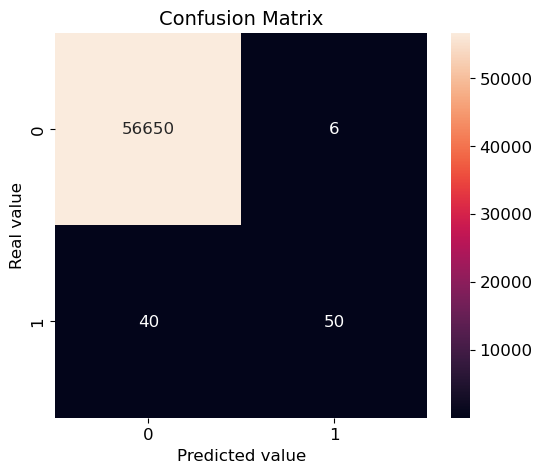

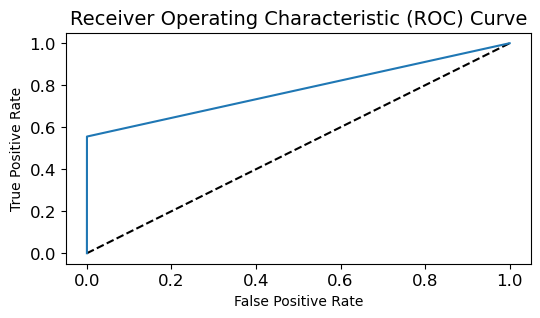

In [190]:
logreg = LogisticRegression(n_jobs=-1, class_weight=None)
fit_predict_metrics(logreg, x_train, x_test, y_train, y_test)

Expectedly, accuracy score is almost 100%, but in the case of imbalanced data, it is not representative.

Recall and ROC-AUC are more important for detecting fraudulent operations, and they are relatively low.

Before proceeding to the next part, let us print average metrics Recall, ROC-AUC and F1 for the same model but with cross-validation. 

In [193]:
# The function for calculating the most meaningful average metrics with cross-validation, but without grid search
def cross_val_without_grid_search(x, y, weight=False):
    metrics = []
    scorings = ['roc_auc', 'recall', 'f1']
    if weight:
        class_weight = 'balanced'
    else:
        class_weight = None
    for scoring in scorings:
        logreg = LogisticRegression(n_jobs=-1, class_weight=class_weight)
        cross_val_scores = cross_val_score(logreg, x, y, cv=5, scoring=scoring)
        metric = round(cross_val_scores.mean(), 3)
        metrics.append(metric)
        print(f"Average {scoring} score:", metric)
    return metrics

In [194]:
metrics_1 = cross_val_without_grid_search(x, y)
metrics = {'With imbalanced classess': metrics_1}

Average roc_auc score: 0.969
Average recall score: 0.589
Average f1 score: 0.682


On average, Recall is also too low, we need to do handle the 'Target' imbalance.

## Automatic Weight Adjustment

In [199]:
metrics_2 = cross_val_without_grid_search(x, y, True)
metrics['With weight adjustment'] = metrics_2

Average roc_auc score: 0.963
Average recall score: 0.892
Average f1 score: 0.106


This is definitely better than without balancing at all, but let us look if we can achieve higher scores.

## Manual Undersampling

Let us try balancing the 'Target' variable by randomly selecting a small sample with 0 values.

In [203]:
# Forming the dataframe for training that will contain 80% of ones in the 'Target' value and the same number of zeros
df_undersampled_1 = df_normalised[df_normalised['Target'] == 1].sample(frac=0.8, random_state=42)
df_undersampled_0 = df_normalised[df_normalised['Target'] == 0].sample(n=len(df_undersampled_1), random_state=42)
df_undersampled_train = pd.concat([df_undersampled_1, df_undersampled_0],axis=0)
print(df_undersampled_train['Target'].value_counts(normalize=True))
print('-'*20)
print('Shape: ', df_undersampled_train.shape)

Target
1    0.5
0    0.5
Name: proportion, dtype: float64
--------------------
Shape:  (756, 31)


In [204]:
# Forming the dataframe for testing with all entries except those in the train set
df_undersampled_test = pd.concat([df_undersampled_train, df_normalised]).drop_duplicates(keep=False)
print(df_undersampled_test['Target'].value_counts(normalize=True))
print('-'*20)
print('Shape: ', df_undersampled_test.shape)

Target
0    0.999664
1    0.000336
Name: proportion, dtype: float64
--------------------
Shape:  (282970, 31)


In [205]:
x_undersampled_train, y_undersampled_train, _, _, _, _ = extract_x_y(df_undersampled_train)

Shape of x: (756, 30)
Shape of y: (756,)


In [206]:
x_undersampled_test, y_undersampled_test, _, _, _, _ = extract_x_y(df_undersampled_test)

Shape of x: (282970, 30)
Shape of y: (282970,)


Accuracy: 0.968
Precision: 0.009
Recall: 0.863
F1-Score: 0.018
ROC-AUC: 0.916
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    282875
           1       0.01      0.86      0.02        95

    accuracy                           0.97    282970
   macro avg       0.50      0.92      0.50    282970
weighted avg       1.00      0.97      0.98    282970



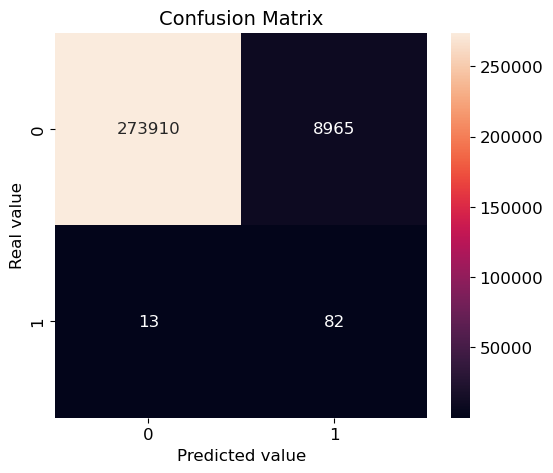

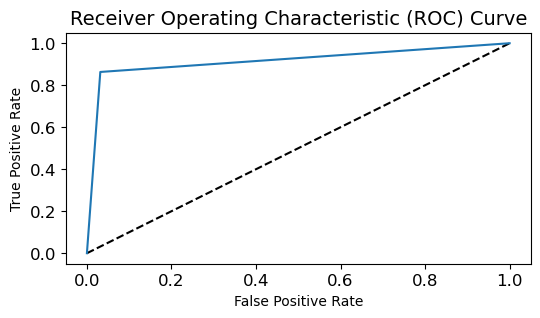

In [207]:
logreg = LogisticRegression(n_jobs=-1, class_weight=None)
roc_auc, recall, f1 = fit_predict_metrics(logreg, x_undersampled_train, x_undersampled_test, y_undersampled_train, y_undersampled_test)

In [208]:
# Forming the dataframe for cross-validation with all 100% of ones in the 'Target' value and the corresponding number of zeros
df_undersampled_1 = df_normalised[df_normalised['Target'] == 1]
df_undersampled_0 = df_normalised[df_normalised['Target'] == 0].sample(n=len(df_undersampled_1), random_state=42)
df_undersampled = pd.concat([df_undersampled_1, df_undersampled_0],axis=0)
print(df_undersampled['Target'].value_counts(normalize=True))
print('-'*20)
print('Shape: ', df_undersampled.shape)

Target
1    0.5
0    0.5
Name: proportion, dtype: float64
--------------------
Shape:  (946, 31)


In [209]:
x_undersampled, y_undersampled, _, _, _, _ = extract_x_y(df_undersampled)

Shape of x: (946, 30)
Shape of y: (946,)


In [210]:
# And the cross-validation was done on 20% of the undersampled dataset as usual
metrics_3 = cross_val_without_grid_search(x_undersampled, y_undersampled)
metrics['With manual undersampling'] = [roc_auc, recall, f1]

Average roc_auc score: 0.96
Average recall score: 0.89
Average f1 score: 0.926


The results are much better than those we obtained before, but f1 score is high most likely due to cross-validation on the undersampled dataset, so it is better to store metrics without cross-validation to be more fair.

## Manual Oversampling

Now, I am going to try oversampling by just copying the records of the underrepresented 'Target' value.

In [214]:
# First we need to separate 20% of entries for testing
df_oversampled_test = df_normalised.sample(frac=0.2, random_state=42)
print(df_oversampled_test['Target'].value_counts(normalize=True))
print('-'*20)
print('Shape: ', df_oversampled_test.shape)

Target
0    0.998414
1    0.001586
Name: proportion, dtype: float64
--------------------
Shape:  (56745, 31)


In [215]:
# What was left will go for training, and the lines corresponding to 'Target' equal to 1 will be copied
df_oversampled_not_test = pd.concat([df_oversampled_test, df_normalised]).drop_duplicates(keep=False)
number_of_copies = len(df_oversampled_not_test[df_oversampled_not_test['Target'] == 0]) // len(df_oversampled_not_test[df_oversampled_not_test['Target'] == 1])
df_oversampled_train = pd.DataFrame()
df_oversampled_train = pd.concat([df_oversampled_not_test[df_oversampled_not_test['Target'] == 1]] * number_of_copies, ignore_index=True)
df_oversampled_train = pd.concat([df_oversampled_train, df_oversampled_not_test], ignore_index=True)
print(df_oversampled_train['Target'].value_counts(normalize=True))
print('-'*20)
print('Shape: ', df_oversampled_train.shape)

Target
1    0.500152
0    0.499848
Name: proportion, dtype: float64
--------------------
Shape:  (453334, 31)


In [216]:
x_oversampled_train, y_oversampled_train, _, _, _, _ = extract_x_y(df_oversampled_train)

Shape of x: (453334, 30)
Shape of y: (453334,)


In [217]:
x_oversampled_test, y_oversampled_test, _, _, _, _ = extract_x_y(df_oversampled_test)

Shape of x: (56745, 30)
Shape of y: (56745,)


Accuracy: 0.978
Precision: 0.06
Recall: 0.889
F1-Score: 0.112
ROC-AUC: 0.933
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56655
           1       0.06      0.89      0.11        90

    accuracy                           0.98     56745
   macro avg       0.53      0.93      0.55     56745
weighted avg       1.00      0.98      0.99     56745



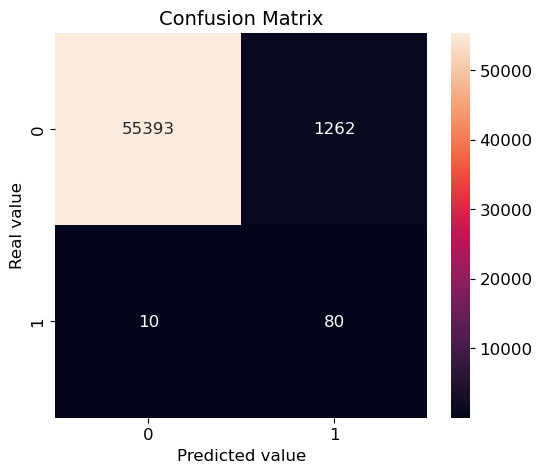

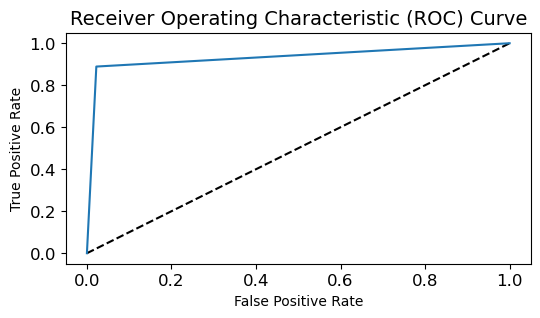

In [218]:
logreg = LogisticRegression(n_jobs=-1, class_weight=None)
roc_auc, recall, f1 = fit_predict_metrics(logreg, x_oversampled_train, x_oversampled_test, y_oversampled_train, y_oversampled_test)

In [219]:
# Forming the dataframe for cross-validation with all 100% of ones in the 'Target' copied
number_of_copies = len(df_normalised[df_normalised['Target'] == 0]) // len(df_normalised[df_normalised['Target'] == 1])
df_oversampled = pd.DataFrame()
df_oversampled = pd.concat([df_normalised[df_normalised['Target'] == 1]] * number_of_copies, ignore_index=True)
df_oversampled = pd.concat([df_oversampled, df_normalised], ignore_index=True)
print(df_oversampled['Target'].value_counts(normalize=True))
print('-'*20)
print('Shape: ', df_oversampled.shape)

Target
1    0.500065
0    0.499935
Name: proportion, dtype: float64
--------------------
Shape:  (566580, 31)


In [220]:
x_oversampled, y_oversampled, _, _, _, _ = extract_x_y(df_oversampled)

Shape of x: (566580, 30)
Shape of y: (566580,)


In [221]:
metrics_4 = cross_val_without_grid_search(x_oversampled, y_oversampled)
metrics['With manual oversampling'] = [roc_auc, recall, f1]

Average roc_auc score: 0.982
Average recall score: 0.921
Average f1 score: 0.938


The cross-validation was implemented on the dataset containing numerous copies of the same data which is not really representative, the results can be biased. Ideally, the cross-validation should be implemented manually to avoid it. Let us just save metrics obtained without cross-validation.

## Oversampling Using SMOTE

In [224]:
from imblearn.over_sampling import SMOTE

# Initialise SMOTE
smote = SMOTE()

In [225]:
# Applying SMOTE to resample the training data
x_smote_train, y_smote_train = smote.fit_resample(x_train, y_train)

Accuracy: 0.975
Precision: 0.054
Recall: 0.889
F1-Score: 0.101
ROC-AUC: 0.932
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.89      0.10        90

    accuracy                           0.97     56746
   macro avg       0.53      0.93      0.54     56746
weighted avg       1.00      0.97      0.99     56746



(0.932, 0.889, 0.101)

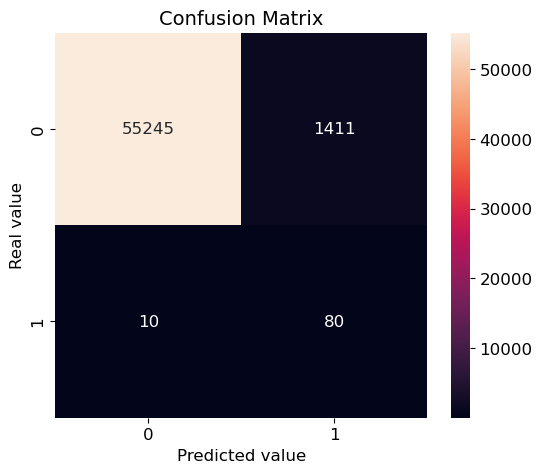

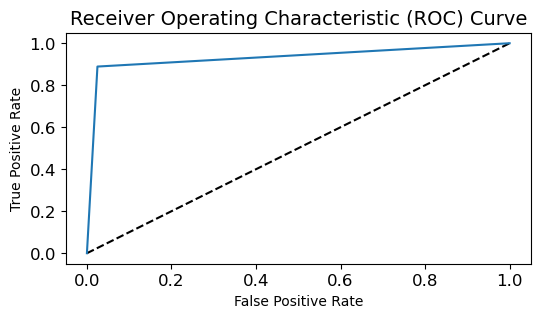

In [226]:
logreg = LogisticRegression(n_jobs=-1, class_weight=None)
fit_predict_metrics(logreg, x_smote_train, x_test, y_smote_train, y_test)

In [227]:
# This time, let us perform cross-validation manually to avoid testing on the synthetic data
def extract_x_y_for_cross_val(df, i):
    start_index = len(df) // 5 * (i - 1)
    end_index = len(df) // 5 * i
    df_test = df.iloc[start_index : end_index]
    df_train = pd.concat([df_test, df]).drop_duplicates(keep=False)
    
    x_test = np.array(df_test.drop('Target', axis=1))
    y_test = np.array(df_test['Target'])
    x_train = np.array(df_train.drop('Target', axis=1))
    y_train = np.array(df_train['Target'])    
    return x_train, x_test, y_train, y_test

Accuracy: 0.975
Precision: 0.054
Recall: 0.889
F1-Score: 0.102
ROC-AUC: 0.932
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56655
           1       0.05      0.89      0.10        90

    accuracy                           0.98     56745
   macro avg       0.53      0.93      0.54     56745
weighted avg       1.00      0.98      0.99     56745

Accuracy: 0.974
Precision: 0.051
Recall: 0.94
F1-Score: 0.097
ROC-AUC: 0.957
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56662
           1       0.05      0.94      0.10        83

    accuracy                           0.97     56745
   macro avg       0.53      0.96      0.54     56745
weighted avg       1.00      0.97      0.99     56745

Accuracy: 0.976
Precision: 0.068
Recall: 0.858
F1-Score: 0.127
ROC-AUC: 0.918
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56632
    

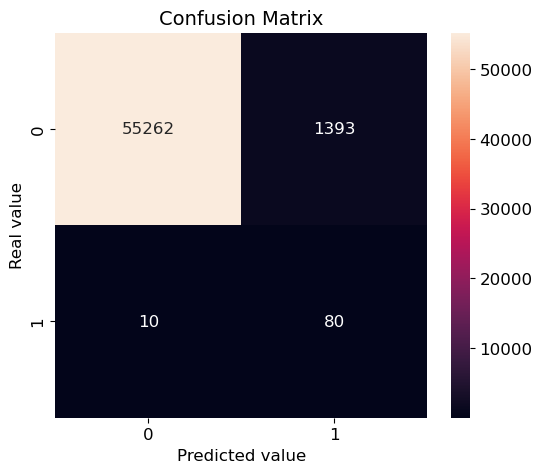

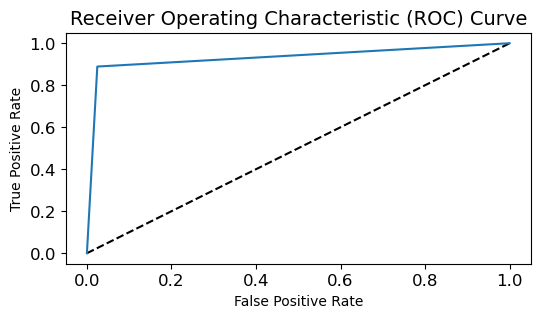

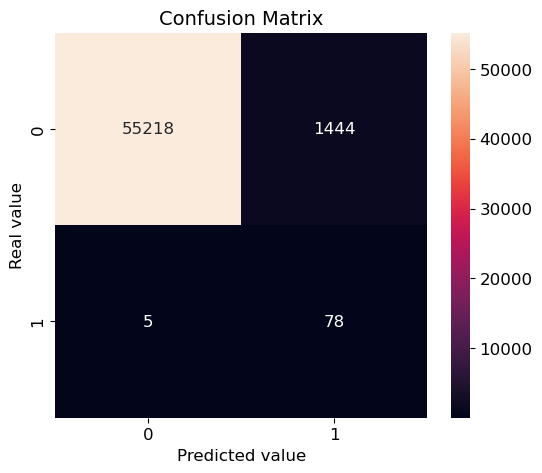

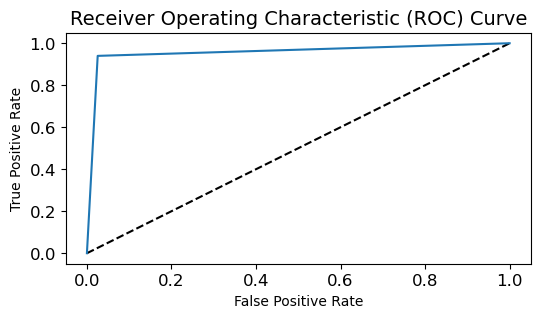

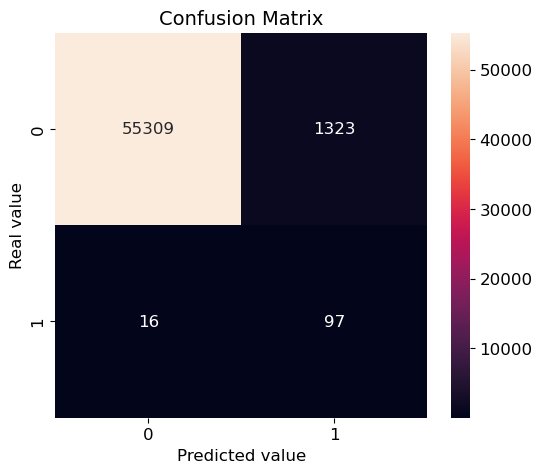

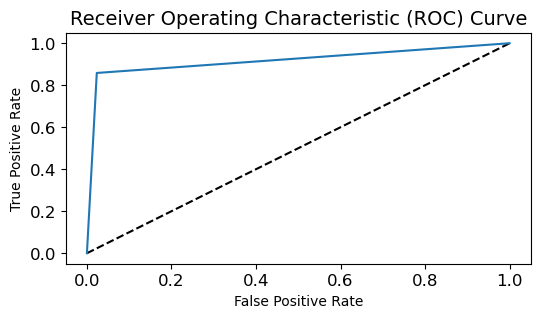

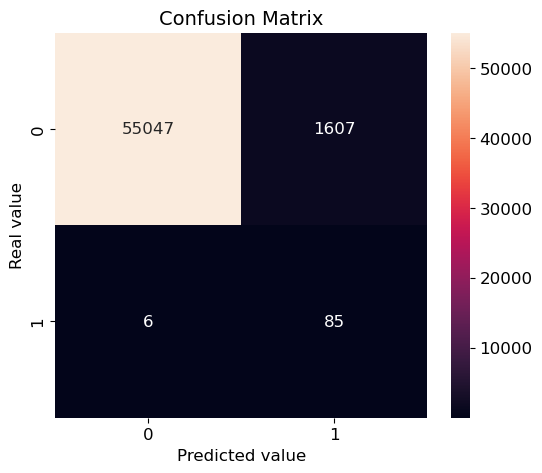

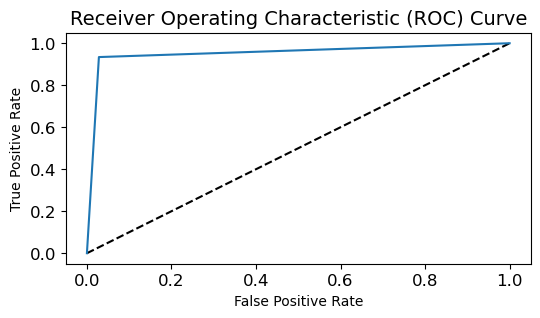

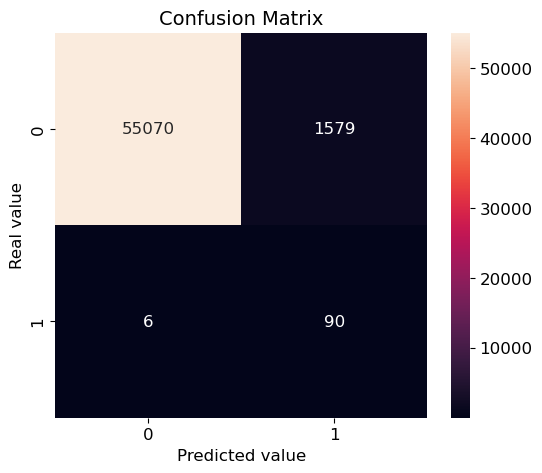

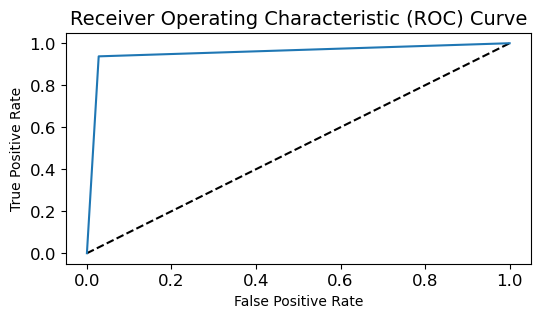

In [228]:
df_smote = df_normalised.sample(frac=1, random_state=42)
df_smote.reset_index(inplace=True, drop=True)
roc_auc_cv = []
recall_cv = []
f1_cv = []
for i in range(1,6):
    x_smote_train, x_smote_test, y_smote_train, y_smote_test = extract_x_y_for_cross_val(df_smote, i)
    x_smote_train, y_smote_train = smote.fit_resample(x_smote_train, y_smote_train)
    logreg = LogisticRegression(n_jobs=-1, class_weight=None)
    roc_auc, recall, f1 = fit_predict_metrics(logreg, x_smote_train, x_smote_test, y_smote_train, y_smote_test)
    roc_auc_cv.append(roc_auc)
    recall_cv.append(recall)
    f1_cv.append(f1)

In [229]:
metrics['With SMOTE'] = [np.array(roc_auc_cv).mean(), np.array(recall_cv).mean(), np.array(f1_cv).mean()]
print(f'Average roc_auc score: {metrics['With SMOTE'][0]}')
print(f'Average recall score: {metrics['With SMOTE'][1]}')
print(f'Average f1 score: {metrics['With SMOTE'][2]}')

Average roc_auc score: 0.943
Average recall score: 0.9118
Average f1 score: 0.1046


SMOTE oversampling so far gave us the highest recall.

## Oversampling Using ADASYN

In [232]:
from imblearn.over_sampling import ADASYN

# Initialise ADASYN
adasyn = ADASYN()

Accuracy: 0.917
Precision: 0.017
Recall: 0.911
F1-Score: 0.034
ROC-AUC: 0.914
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56655
           1       0.02      0.91      0.03        90

    accuracy                           0.92     56745
   macro avg       0.51      0.91      0.50     56745
weighted avg       1.00      0.92      0.96     56745

Accuracy: 0.901
Precision: 0.014
Recall: 0.988
F1-Score: 0.028
ROC-AUC: 0.945
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56662
           1       0.01      0.99      0.03        83

    accuracy                           0.90     56745
   macro avg       0.51      0.94      0.49     56745
weighted avg       1.00      0.90      0.95     56745

Accuracy: 0.927
Precision: 0.024
Recall: 0.885
F1-Score: 0.046
ROC-AUC: 0.906
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56632
   

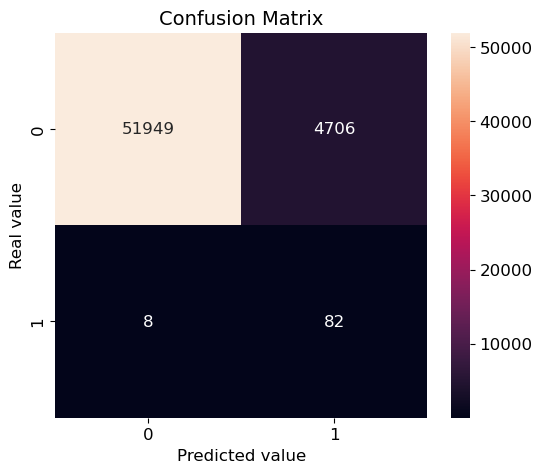

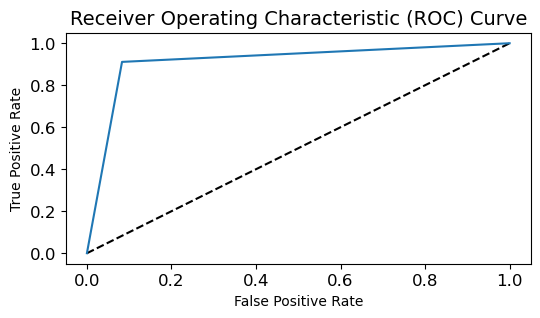

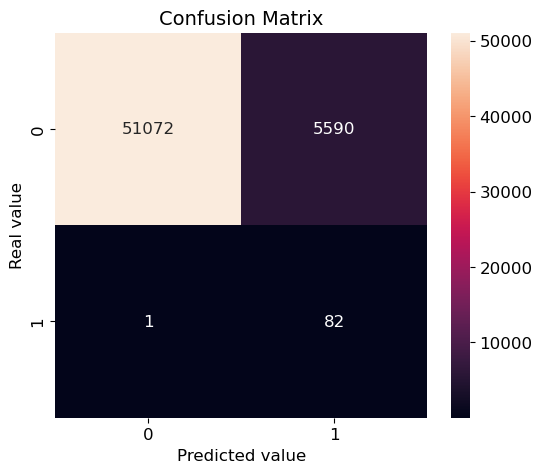

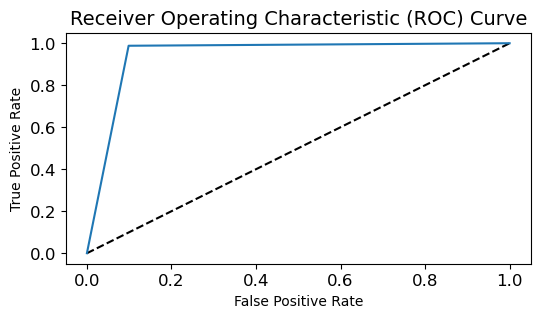

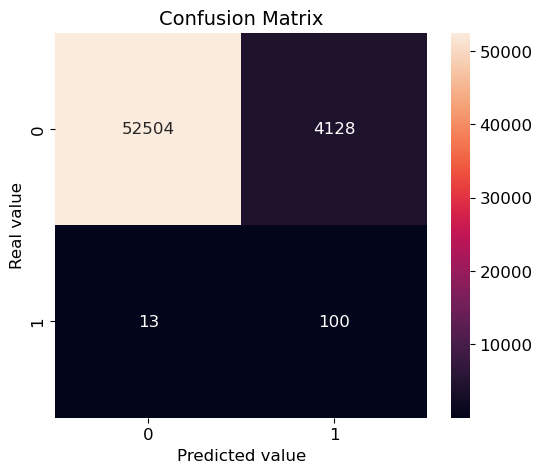

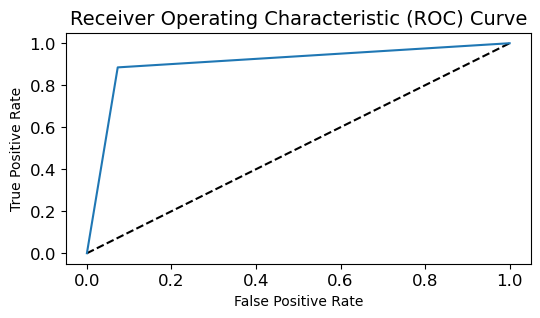

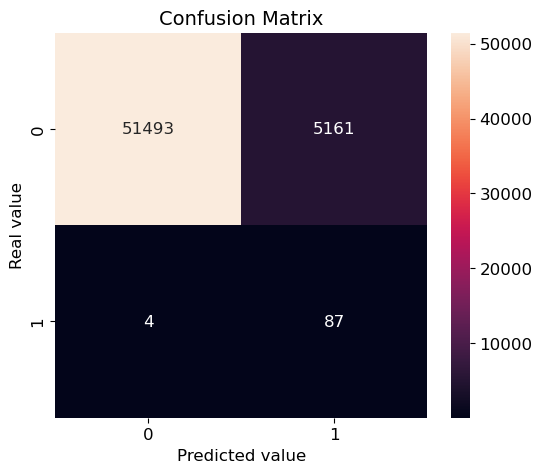

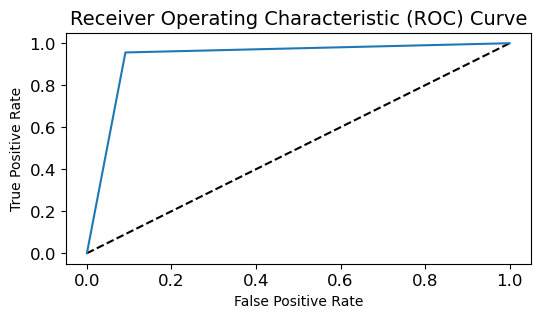

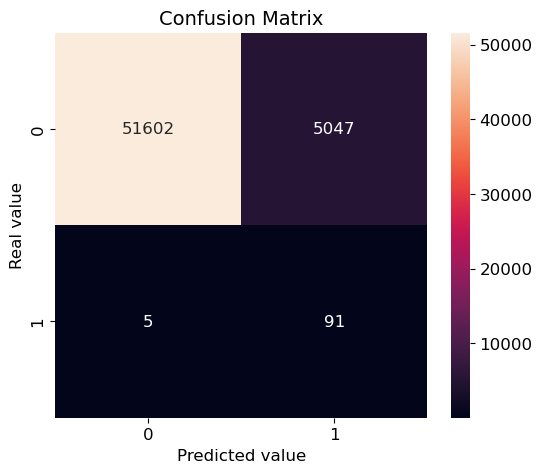

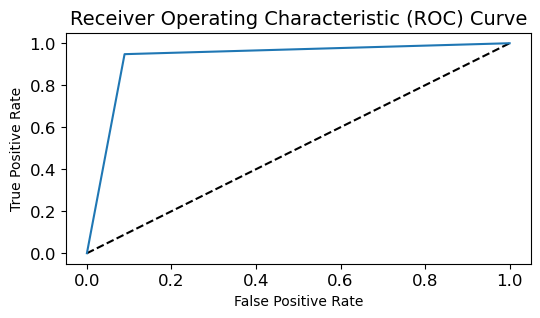

In [233]:
df_adasyn = df_smote.copy()
roc_auc_cv = []
recall_cv = []
f1_cv = []
for i in range(1,6):
    x_adasyn_train, x_adasyn_test, y_adasyn_train, y_adasyn_test = extract_x_y_for_cross_val(df_adasyn, i)
    x_adasyn_train, y_adasyn_train = adasyn.fit_resample(x_adasyn_train, y_adasyn_train)
    logreg = LogisticRegression(n_jobs=-1, class_weight=None)
    roc_auc, recall, f1 = fit_predict_metrics(logreg, x_adasyn_train, x_adasyn_test, y_adasyn_train, y_adasyn_test)
    roc_auc_cv.append(roc_auc)
    recall_cv.append(recall)
    f1_cv.append(f1)

In [234]:
metrics['With ADASYN'] = [np.array(roc_auc_cv).mean(), np.array(recall_cv).mean(), np.array(f1_cv).mean()]
print(f'Average roc_auc score: {metrics['With ADASYN'][0]}')
print(f'Average recall score: {metrics['With ADASYN'][1]}')
print(f'Average f1 score: {metrics['With ADASYN'][2]}')

Average roc_auc score: 0.9252
Average recall score: 0.9376
Average f1 score: 0.0352


Recall is the highest among others, but f1 metric is too low: approximately every 10th usual operation is considered fraudulent. It is unlikely that such suspiciousness is acceptable in real-life conditions.

## Assessment of Results

In [296]:
metrics_df = pd.DataFrame(metrics).T
metrics_df.rename(columns={0:'roc_auc', 1: 'recall', 2: 'f1'}, inplace=True)
metrics_df.sort_values('recall', ascending=False)

,roc_auc,recall,f1
With ADASYN,0.9252,0.9376,0.0352
With SMOTE,0.9430,0.9118,0.1046
With weight adjustment,0.9630,0.8920,0.1060
With manual oversampling,0.9330,0.8890,0.1120
With manual undersampling,0.9160,0.8630,0.0180
With imbalanced classess,0.9690,0.5890,0.6820


We can see that ADASYN gives the highest Recall metric and the lowest number of type II mistakes which means it recognises the largest number of fraudulent transactions. At the same time, its F1 metric is very low and the number of type I mistakes is too high. It is unlikely that such an algorithm can be used in practice.

As for SMOTE, it has only a little lower Recall metric, while its F1 metric is considerably higher.

Automatic weight adjustment or manual oversampling and undersampling showed similar results, as well.

And finally, model without class balancing gave expectedly dissatisfactory results.

In all our futher considerations, let us use automatic weight adjustment for simplicity. Otherwise we won't be able to use GridSearch with cross-validation and will need to do cross-validation manually. In real life, of course, model selection depends on the task.

## Iteration Through Parameters Using Pipeline, GridSearch CV and Dask

Let us iterate through several parameters using GridSearch CV, Pipeline and Dask: 
1. Regularisation coefficient
2. Proportion of L1 and L2 regularisation weights
3. Number of polynomial features

In [423]:
from sklearn.pipeline import Pipeline  # conveyor of processing 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import GridSearchCV
import dask_ml.model_selection as dcv
import dask.array as da

In [427]:
# This is what I wanted to implement at first, but after I ran it, it never stopped. 
# I have not enough computing capacity.
'''
pipe = Pipeline(steps=[
    ('pf', PolynomialFeatures(include_bias=False)),  # Creating polynomial features
    ('feature_selection', SelectKBest(score_func=f_classif)),  # Feature selection using ANOVA F-value
    ('log_reg', LogisticRegression(penalty='elasticnet', solver='saga'))  # Logistic Regression with ElasticNet (regularisation combining L1 and L2)
])

param_grid = {
    'pf__degree': [1, 2],  # Polynomial features degree
    'feature_selection__k': [20, 30],  # Number of features to select
    'log_reg__C': [0.5, 1],  # Regularisation strength (alpha)
    'log_reg__l1_ratio': [0.2, 0.5, 0.8],  # Balance between Lasso and Ridge (ElasticNet)
    'log_reg__class_weight': ['balanced', None]  # Handle class imbalance
}

# Iterating through parameters using GridSearchCV
x_smote, y_smote = smote.fit_resample(x, y)
scorings = ['roc_auc', 'recall', 'f1']
for scoring in scorings:
    grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring=scoring, n_jobs=4, verbose=3)
    grid_search.fit(x_smote, y_smote)

    print(f"Best {scoring} score: ", grid_search.best_score_) 
    print(f"Best parameters for {scoring}: ", grid_search.best_params_)
    print('-'*20)  
''';

After the failed attempt to iterate through all parameters at once, I have to resort to the step-wise approach despite the fact that there is a risk to skip the best parameters.

First of all, let us iterate through some regularisation coefficients.

In [430]:
pipe = Pipeline(steps=[
    ('log_reg', LogisticRegression(penalty='elasticnet', solver='saga'))  # Logistic Regression with ElasticNet (regularisation combining L1 and L2)
])

In [432]:
param_grid = {
    'log_reg__C': [0.1, 0.5, 1.0],  # Regularisation strength (alpha)
    'log_reg__l1_ratio': [0.5, 0.8, 1],  # Balance between Lasso and Ridge (ElasticNet)
    'log_reg__class_weight': ['balanced']  # Handling class imbalance is unnecessary because the data was processed by SMOTE
}

In [470]:
# Function iterating through parameters using GridSearchCV
def grid_search_cv():
    scorings = ['roc_auc', 'recall', 'f1']
    x_dask = da.from_array(x)
    y_dask = da.from_array(y)
    for scoring in scorings:
        grid_search = dcv.GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring=scoring, n_jobs=4)
        grid_search.fit(x_dask, y_dask)
    
        print(f"Best {scoring} score: ", grid_search.best_score_) 
        print(f"Best parameters for {scoring}: ", grid_search.best_params_)
        print('-'*20)  

In [ ]:
grid_search_cv()

For further analysis, we are going to use the following parameters: log_reg__l1_ratio = 0.5 and log_reg__C = 0.5.

Now, let us see if adding polynomial features can improve our metrics.

In [365]:
pipe = Pipeline(steps=[
    ('pf', PolynomialFeatures(include_bias=False)),  # Creating polynomial features
    ('log_reg', LogisticRegression(penalty='elasticnet', solver='saga'))  # Logistic Regression with ElasticNet (regularisation combining L1 and L2)
])

In [367]:
param_grid = {
    'log_reg__C': [0.5],  # Regularisation strength (alpha)
    'log_reg__l1_ratio': [0.5],  # Balance between Lasso and Ridge (ElasticNet)
    'pf__degree': [1, 2],  # Polynomial features degree    
    'log_reg__class_weight': ['balanced']  # Handling class imbalance is unnecessary because the data was processed by SMOTE
}

In [369]:
grid_search_cv()

Best roc_auc score:  0.9570486952361419
Best parameters for roc_auc:  {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__l1_ratio': 0.5, 'pf__degree': 1}
--------------------
Best recall score:  0.9026877645679622
Best parameters for recall:  {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__l1_ratio': 0.5, 'pf__degree': 2}
--------------------
Best f1 score:  0.09839252235976283
Best parameters for f1:  {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__l1_ratio': 0.5, 'pf__degree': 1}
--------------------


It takes a lot of time for the above cell to compute, so I decided to save the results below just in case:

Best roc_auc score:  0.9570486952361419

Best parameters for roc_auc:  {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__l1_ratio': 0.5, 'pf__degree': 1}

+--------------------

Best recall score:  0.9026877645679622

Best parameters for recall:  {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__l1_ratio': 0.5, 'pf__degree': 2

+--------------------

 
Best f1 score:  0.09839252235976283

Best parameters for f1:  {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__l1_ratio': 0.5, 'pf__degree': 1}


+--------------------


We can infer that although Recall shows some insignificant growth with the introduction of the second degree polynomial, the computation time is too long for this model to be used.

# Conclusion

In this task, I tested Logistic Regression capabilities in credit card fraud detection.

Among all the considered parameters, the following ones are found to be optimal: 
1. balance between Lasso and Ridge l1_ratio = 0.5;
2. regularisation strength C = 0.5;
3. polynomial degree = 1.

Comparison of aproaches to combat imbalance:

1. ADASYN gives the highest Recall metric and the lowest number of type II mistakes, but its F1 metric is very low and the number of type I mistakes is too high. It cannot be used in practice.
2. SMOTE has only a little lower Recall metric, while its F1 metric is considerably higher.
3. Automatic weight adjustment or manual oversampling and undersampling showed similar results, as well.

Final metrics see below:

In [484]:
metrics_df.sort_values('recall', ascending=False)

,roc_auc,recall,f1
With ADASYN,0.9252,0.9376,0.0352
With SMOTE,0.9430,0.9118,0.1046
With weight adjustment,0.9630,0.8920,0.1060
With manual oversampling,0.9330,0.8890,0.1120
With manual undersampling,0.9160,0.8630,0.0180
With imbalanced classess,0.9690,0.5890,0.6820


By adjusting the threshold of classification, we can balance the metrics in accordance to the task at hand.